## Other than the obvious tasks of producing visual representations of the data, as decreed by the assignment, these are components that are even more important for me:

1. continual use and practice of Graphlab Create
2. use of seaborn to replace the standard esthetics of matplotlib

<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

<a href="javascript:code_toggle()">[Toggle Code]</a>

In [1]:
import graphlab as gl
import graphlab.aggregate as agg

#gl.product_key.set_product_key('6E19-9A71-9128-0AD3-AA0C-8C21-8919-1180')

gl.canvas.set_target('ipynb') # output a single GraphLab Canvas view to a IPython Notebook cell

import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

[INFO] 1452800734 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/certifi/cacert.pem
1452800734 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to studiocardo@gmail.com and will expire on November 14, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-84549 - Server binary: /Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1452800734.log
[INFO] GraphLab Server Version: 1.7.1
/Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the lat

In [2]:
sf = gl.SFrame.read_csv('./data/sanfrancisco_incidents_summer_2014.csv')
#sea = gl.SFrame.read_csv('data/seattle_incidents_summer_2014.csv')

PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/SF Crime/data/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.320975 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,float,float,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/howard/Desktop/SH3.0/Coursera/UoW/Visual/SF Crime/data/sanfrancisco_incidents_summer_2014.csv
PROGRESS: Parsing completed. Parsed 28993 lines in 0.25088 secs.


In [3]:
sf.column_names()

['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

___
### Let's get a quick overlook of the SF crime statistics

In [4]:
sf

Columns:
	IncidntNum	int
	Category	str
	Descript	str
	DayOfWeek	str
	Date	str
	Time	str
	PdDistrict	str
	Resolution	str
	Address	str
	X	float
	Y	float
	Location	str
	PdId	int

Rows: 28993

Data:
+------------+-----------------------------+-------------------------------+
| IncidntNum |           Category          |            Descript           |
+------------+-----------------------------+-------------------------------+
| 140734311  |            ARSON            |       ARSON OF A VEHICLE      |
| 140736317  |         NON-CRIMINAL        |         LOST PROPERTY         |
| 146177923  |        LARCENY/THEFT        |  GRAND THEFT FROM LOCKED AUTO |
| 146177531  |        LARCENY/THEFT        |  GRAND THEFT FROM LOCKED AUTO |
| 140734220  |         NON-CRIMINAL        |         FOUND PROPERTY        |
| 140734349  |        DRUG/NARCOTIC        |    POSSESSION OF MARIJUANA    |
| 140734349  |        DRUG/NARCOTIC        | POSSESSION OF CONTROLLED S... |
| 140734349  | DRIVING UNDER THE INFLUENCE | DRIVING WHILE UNDER THE IN... |
| 140738147  |        OTHER OFFENSES       | EVADING A POLICE OFFICER R... |
| 140734258  |           TRESPASS          |          TRESPASSING          |
+------------+-----------------------------+-------------------------------+
+-----------+------------+-------+------------+----------------+
| DayOfWeek |    Date    |  Time | PdDistrict |   Resolution   |
+-----------+------------+-------+------------+----------------+
|   Sunday  | 08/31/2014 | 23:50 |  BAYVIEW   |      NONE      |
|   Sunday  | 08/31/2014 | 23:45 |  MISSION   |      NONE      |
|   Sunday  | 08/31/2014 | 23:30 |  SOUTHERN  |      NONE      |
|   Sunday  | 08/31/2014 | 23:30 |  RICHMOND  |      NONE      |
|   Sunday  | 08/31/2014 | 23:23 |  RICHMOND  |      NONE      |
|   Sunday  | 08/31/2014 | 23:13 |  SOUTHERN  | ARREST, BOOKED |
|   Sunday  | 08/31/2014 | 23:13 |  SOUTHERN  | ARREST, BOOKED |
|   Sunday  | 08/31/2014 | 23:13 |  SOUTHERN  | ARREST, BOOKED |
|   Sunday  | 08/31/2014 | 23:00 | INGLESIDE  |      NONE      |
|   Sunday  | 08/31/2014 | 23:00 |  CENTRAL   | ARREST, CITED  |
+-----------+------------+-------+------------+----------------+
+---------------------------+----------------+---------------+
|          Address          |       X        |       Y       |
+---------------------------+----------------+---------------+
| LOOMIS ST / INDUSTRIAL ST | -122.405646995 | 37.7383221869 |
|   400 Block of CASTRO ST  | -122.435012094 | 37.7617677183 |
|  1000 Block of MISSION ST | -122.409795195 | 37.7800356268 |
|    FULTON ST / 26TH AV    | -122.485262988 | 37.7725176473 |
|  800 Block of LA PLAYA ST | -122.509895418 | 37.7723131977 |
|     11TH ST / MINNA ST    | -122.416578493 | 37.7739070745 |
|     11TH ST / MINNA ST    | -122.416578493 | 37.7739070745 |
|     11TH ST / MINNA ST    | -122.416578493 | 37.7739070745 |
|  1400 Block of DOLORES ST | -122.424497945 | 37.7466488718 |
|   900 Block of MASON ST   | -122.410845624 | 37.7923158748 |
+---------------------------+----------------+---------------+
+-------------------------------+----------------+
|            Location           |      PdId      |
+-------------------------------+----------------+
| (37.7383221869053, -122.40... | 14073431126031 |
| (37.7617677182954, -122.43... | 14073631771000 |
| (37.7800356268394, -122.40... | 14617792306244 |
| (37.7725176473142, -122.48... | 14617753106244 |
| (37.7723131976814, -122.50... | 14073422072000 |
| (37.773907074489, -122.416... | 14073434916010 |
| (37.773907074489, -122.416... | 14073434916662 |
| (37.773907074489, -122.416... | 14073434965050 |
| (37.7466488718366, -122.42... | 14073814727175 |
| (37.7923158747647, -122.41... | 14073425827195 |
+-------------------------------+----------------+
[28993 rows x 13 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### The tool makes it easy to see how the crime incidents spread across different PD districts.  But we are going to do things the hard way by exacting the data and plot it 

In [5]:
sf_PdDistrict = sf.groupby(["PdDistrict"], {'Counts':gl.aggregate.COUNT()}).sort('Counts', ascending=False)

In [6]:
min=sf_PdDistrict['Counts'].min()
sf_PdDistrict['normalized']=sf_PdDistrict['Counts'].apply(lambda x: float(x)/min).apply(lambda x: round(x, 2))

In [7]:
sf_PdDistrict.sort('normalized', ascending=False)
sf_PdDistrict['normalized']

dtype: float
Rows: 10
[3.71, 2.39, 2.32, 2.27, 1.76, 1.54, 1.46, 1.2, 1.1, 1.0]

## Categories of Crime by PdDistrict

While Figure 1 shows a nice summary of the total number of reported crimes by PdDistrict.  I think it would be interesteing to also find out exactly what the top 5 categories are in each PdDistrict and what proportions they occupy.

So.

We need to:

1. arrange by PdDistrict and then by Category
2. select only the top 5 categories and group the incidents from remaining categories into one bucket called Others
3. plot the bar chart like Figure 1 but each bar would have different colors showing different categories
4. sort in such way that the top category will be at the highest position on the bar stack.


## 1. Crime Reports by PdDistrict and Category

In [8]:
# 1. arrange by PdDistrict and then by Category

sf_PdDistrict_pd = sf.groupby(["PdDistrict",'Category'], {'Counts':gl.aggregate.COUNT()}).sort('Counts', ascending=False)

#
# convert SFrame to a Pandas DF so we can utilize the plotting utils
#
#sf_PdDistrict_pd = gl.SFrame.to_dataframe(sf_PdDistrict_pd)
sf_PdDistrict_pd

Columns:
	Category	str
	PdDistrict	str
	Counts	int

Rows: 265

Data:
+----------------+------------+--------+
|    Category    | PdDistrict | Counts |
+----------------+------------+--------+
| LARCENY/THEFT  |  SOUTHERN  |  2562  |
| LARCENY/THEFT  |  CENTRAL   |  1574  |
| LARCENY/THEFT  |  NORTHERN  |  1499  |
| LARCENY/THEFT  |  MISSION   |  671   |
|  NON-CRIMINAL  |  SOUTHERN  |  639   |
| LARCENY/THEFT  |    PARK    |  576   |
| LARCENY/THEFT  | INGLESIDE  |  548   |
| LARCENY/THEFT  |  TARAVAL   |  547   |
| OTHER OFFENSES |  SOUTHERN  |  543   |
|    ASSAULT     |  SOUTHERN  |  528   |
+----------------+------------+--------+
[265 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### I found the top 5 categories and the remaining for all PdDistricts here 

and put them into a new SF called counts_sf

In [9]:
# Create an empty pandas DF
#
counts_sf = gl.SFrame()
sfpd = sf_PdDistrict['PdDistrict']

for p in sfpd:
    this_p = sf_PdDistrict_pd.filter_by(p, 'PdDistrict').sort('Counts', ascending=False)
    top5 = this_p.head(5)
    not_top5 = this_p['Counts'][5:len(this_p)].sum()
    other = gl.SFrame({'Category': ["OTHER"], 'PdDistrict': [p], 'Counts': [not_top5]})
    top5 = top5.append(other)
    counts_sf = counts_sf.append(top5)

counts_sf['Category'].unique()

dtype: str
Rows: 10
['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'OTHER OFFENSES', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'OTHER', 'WARRANTS']

In [10]:
# Reduce the category variation of sf to what's in top_crimes

sf2 = sf

# Hacking it by hand... Can't work out this SFrame->SArray->list element removal

#True if x % 2 == 0 else False
#sf[sf['id'].apply(lambda x: math.log(x) <= 1)]

def changecrime(crime):
    top_crimes = ['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS']
 
    if crime in top_crimes:
        return crime
    else:
        return "OTHER OFFENSES"

sf2['Category'] = sf2['Category'].apply(changecrime)
#sf2[sf2['Category'].apply(lambda x: x if x in top_crimes else "OTHER OFFENSES")]

sf2g = sf2.groupby('Category', {'Counts': agg.COUNT()}).sort('Counts', ascending=False)
sf2g
larceny = sf2[sf2['Category'] == "LARCENY/THEFT"]

llcool = larceny.groupby("PdDistrict", {'Counts': agg.COUNT()})
pdl = llcool.to_dataframe()
pdl.set_index(pdl['PdDistrict'])

top_crimes = ['VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS']

pdsf2 = pd.DataFrame(index=sfpd)
pdsf2 = pdsf2.sort(ascending=False)

/Users/howard/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [11]:
top_crimes = ['OTHER OFFENSES','VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS']

total = sf2.groupby("PdDistrict", {"TOTAL": agg.COUNT()}).sort('PdDistrict', ascending=False)
df_topcrimes = total.to_dataframe()
   
for crime in top_crimes:
    col = sf2[sf2['Category'] == crime].groupby("PdDistrict", {crime: agg.COUNT()}).sort('PdDistrict', ascending=False)
    pdcol = col.to_dataframe()
    pdcol.set_index(pdcol['PdDistrict'])
    pdcol
    df_topcrimes.loc[:,crime] = pdcol

#pdsf2 = pdsf2.sort_values("TOTAL", ascending=False)
df_topcrimes=df_topcrimes.sort_values("TOTAL", ascending=False)


In [13]:
from bokeh.charts import Bar, output_notebook, output_file, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.palettes import Spectral10
import pandas as pd
from bokeh.plotting import reset_output
from bokeh.models.widgets.layouts import VBoxForm


bar = Bar(df_topcrimes,
          values=blend('OTHER OFFENSES','VEHICLE THEFT', 'ASSAULT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'LARCENY/THEFT', 'DRUG/NARCOTIC', 'MISSING PERSON', 'WARRANTS', name='Incidents', labels_name='Incident'),
          label=cat(columns='PdDistrict', sort=False),
          stack=cat(columns='Incident', sort=False),
          color=color(columns='Incident', palette=Spectral10, sort=False),
          legend='top_right',
          title="Crime Indident by PdDistrict",
          tooltips=[('Type: ', '@Incident')],
          plot_width = 900, plot_height=600
         )

output_notebook()
show(bar)

# Output to a file too
reset_output()
output_file('./output/crime_by_pddistrict.html')
show(VBoxForm(bar))

BokehJS successfully loaded.

[ERROR] W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Chart, ViewModel:Plot, ref _id: d1703130-43d1-4308-a319-3b8dc07c8167


In [14]:
# Need to overwrite the existing numberical index with the PdDistrict
# It's easier to do so after you have done the SFrame->DF conversion
#
counts_pd = gl.SFrame.to_dataframe(counts_sf)

counts_pd = counts_pd.set_index(counts_pd['PdDistrict'])

# Necessary step otherwise...  You'll see if you don't add this step
#
counts_pd.index.name=None
counts_pd

# Structure a DF w/ columnar data format 

# s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

index = counts_sf['PdDistrict'].unique()
counts_sf

Columns:
	Category	str
	PdDistrict	str
	Counts	int

Rows: 60

Data:
+----------------+------------+--------+
|    Category    | PdDistrict | Counts |
+----------------+------------+--------+
| LARCENY/THEFT  |  SOUTHERN  |  2562  |
|  NON-CRIMINAL  |  SOUTHERN  |  639   |
| OTHER OFFENSES |  SOUTHERN  |  543   |
|    ASSAULT     |  SOUTHERN  |  528   |
|    WARRANTS    |  SOUTHERN  |  331   |
|     OTHER      |  SOUTHERN  |  1136  |
| LARCENY/THEFT  |  MISSION   |  671   |
| OTHER OFFENSES |  MISSION   |  502   |
|    ASSAULT     |  MISSION   |  459   |
|  NON-CRIMINAL  |  MISSION   |  345   |
+----------------+------------+--------+
[60 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

## 2. Now let's see what is going on in Southern PD from a different plot style

In [15]:
so=sf[sf['PdDistrict']=='SOUTHERN']
so.show(view="Summary")

In [16]:
# Get the top 6 categories within this PdDistrict
#
sf_cat = sf.groupby('Category', agg.COUNT).sort('Count', ascending=False)
top_cat = sf_cat['Category'][0]

In [17]:
top_descript_in_top_cat = gl.SFrame()
top_descript_in_top_cat = sf.filter_by(top_cat, 'Category').groupby('Descript', agg.COUNT).sort('Count', ascending=False)

In [18]:
# Get the top 6 categories within this PdDistrict
#
rest_count = top_descript_in_top_cat['Count'][5:len(top_descript_in_top_cat)].sum()

In [19]:
top5_descript_in_top_cat = gl.SFrame()
top5_descript_in_top_cat = top_descript_in_top_cat.head(5)

In [20]:
rest = gl.SFrame({'Descript': ["Rest"], 'Count': [rest_count]})

___
### What is the heck goes on in the Southern PD District?
Let's break down the crime category in the Southern PD District and plot them out

In [21]:
top5_descript_in_top_cat = top5_descript_in_top_cat.append(rest)

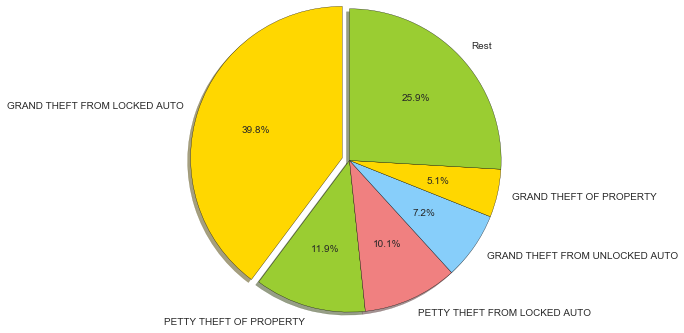

In [22]:
labels = top5_descript_in_top_cat['Descript']
data = top5_descript_in_top_cat['Count']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' ]
explode = [0] * top5_descript_in_top_cat.num_rows()
explode[0] = 0.05

plt.pie(data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [23]:
colors10 = [Purples9[0], Purples9[1], Purples9[2], Purples9[3], Spectral7[0], Spectral7[1], Spectral7[2], Spectral7[5], Spectral7[6], Spectral7[4]]

southern=sf[sf['PdDistrict']=='SOUTHERN']

map_options = GMapOptions(
    lat=37.763, lng=-122.444, 
    map_type="roadmap", 
    zoom=15, 
    styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

x_range = Range1d()
y_range = Range1d()

i = 0

# Prepping the GMapPlot
plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title='Break-down by Categories in Southern PD District', plot_width=1000, plot_height=900,
)

# Data
categories = southern['Category'].unique()


for category in categories:
    temp = southern[southern['Category'] == category]
    source = ColumnDataSource(
    data=dict(
        lat=temp['Y'],
        lon=temp['X']
    )
    )
    circle = Circle(x="lon", y="lat", size=4, fill_color=colors10[i], line_color=colors10[i])

    i = i+1
    plot.add_glyph(source, circle)
    
pan = PanTool()
wheel_zoom = WheelZoomTool()

plot.add_tools(pan,wheel_zoom)
output_notebook()
show(plot)

NameError: name 'Purples9' is not defined

___
## 3. Have your stuff stolen from your car

Everyone who's ever lived in a major city most likely has his/her car broken in once or twice or more time.  The general intuition suggests that the time of the day and the location where you park have a lot to do with the chance of getting your car broken in.  Let's take a look at the date to see if that intuition holds.



In [24]:
def timegrp(time):
    breaks = ["00:00", "02:00", "04:00", "06:00", "08:00", "10:00", "12:00","14:00", "16:00", "18:00", "20:00", "22:00", "24:00"]
    
    if ((time >= breaks[0]) & (time<breaks[1])):
        return "00-02"
    elif ((time >= breaks[1]) & (time<breaks[2])):
        return "02-04"
    elif ((time >= breaks[2]) & (time<breaks[3])):
        return "04-06"
    elif ((time >= breaks[3]) & (time<breaks[4])):
        return "06-08"
    elif ((time >= breaks[4]) & (time<breaks[5])):
        return "08-10"
    elif ((time >= breaks[5]) & (time<breaks[6])):
        return "10-12"
    elif ((time >= breaks[6]) & (time<breaks[7])):
        return "12-14"
    elif ((time >= breaks[7]) & (time<breaks[8])):
        return "14-16"
    elif ((time >= breaks[8]) & (time<breaks[9])):
        return "16-18"
    elif ((time >= breaks[9]) & (time<breaks[10])):
        return "18-20"
    elif ((time >= breaks[10]) & (time<breaks[11])):
        return "20-22"
    else:
        return "20-24"
    
sf['Timegrp'] = sf['Time'].apply(timegrp)
temp=sf.groupby('Timegrp', agg.COUNT).sort('Timegrp')

# Create another column to index the Timegrp, which is needed later for the slider
def timegrp_index(time):
    
    if ((time == "00-02")):
        return 0
    elif ((time == "02-04")):
        return 1
    elif ((time == "04-06")):
        return 2
    elif ((time == "06-08")):
        return 3
    elif ((time == "08-10")):
        return 4
    elif ((time == "10-12")):
        return 5
    elif ((time == "12-14")):
        return 6
    elif ((time == "14-16")):
        return 7
    elif ((time == "16-18")):
        return 8
    elif ((time == "18-20")):
        return 9
    elif ((time == "20-22")):
        return 10
    else:
        return 11
    
sf['Timegrp_index'] = sf['Timegrp'].apply(timegrp_index)

In [25]:
key = ["GRAND THEFT FROM LOCKED AUTO", "PETTY THEFT FROM LOCKED AUTO"]
theft_auto = sf.filter_by(key, 'Descript')
theft_auto_resolve = theft_auto.groupby('Resolution', agg.COUNT).sort('Count', ascending=False)

In [26]:
# Here's a break down of the theft from auto by PdDistrict
#
theft_auto_pddistrict = theft_auto.groupby('PdDistrict', agg.COUNT).sort('Count', ascending=False)

In [27]:
# So, what is the "resolution" rate of a theft from a locked auto case?
#

theft_auto_resolve

Columns:
	Resolution	str
	Count	int

Rows: 7

Data:
+-------------------------------+-------+
|           Resolution          | Count |
+-------------------------------+-------+
|              NONE             |  4684 |
|         ARREST, BOOKED        |   32  |
|         JUVENILE CITED        |   1   |
| COMPLAINANT REFUSES TO PRO... |   1   |
|  PROSECUTED BY OUTSIDE AGENCY |   1   |
|           UNFOUNDED           |   1   |
|         ARREST, CITED         |   1   |
+-------------------------------+-------+
[7 rows x 2 columns]

In [28]:
theft_auto_size = theft_auto.groupby('Descript', agg.COUNT).sort('Count', ascending=False)

In [29]:
# What's the divide b/n Grand vs. Petty theft from locked autos?
# See http://www.avvo.com/legal-guides/ugc/whats-the-difference-between-grand-theft-and-petty-theft
#

theft_auto_size

Columns:
	Descript	str
	Count	int

Rows: 2

Data:
+------------------------------+-------+
|           Descript           | Count |
+------------------------------+-------+
| GRAND THEFT FROM LOCKED AUTO |  3766 |
| PETTY THEFT FROM LOCKED AUTO |  955  |
+------------------------------+-------+
[2 rows x 2 columns]

In [30]:
#by_age = trainSF_a.groupby(["Survived", "Age_grp"], {'count':gl.aggregate.COUNT()}).sort('Age_grp')

theft_auto_td = theft_auto.groupby(['PdDistrict', 'Timegrp'], agg.COUNT('Count')).sort('Count', ascending=False)
theft_auto_td

Columns:
	PdDistrict	str
	Timegrp	str
	Count	int

Rows: 120

Data:
+------------+---------+-------+
| PdDistrict | Timegrp | Count |
+------------+---------+-------+
|  SOUTHERN  |  18-20  |  292  |
|  SOUTHERN  |  20-22  |  221  |
|  SOUTHERN  |  20-24  |  178  |
|  NORTHERN  |  20-22  |  178  |
|  NORTHERN  |  18-20  |  163  |
|  CENTRAL   |  18-20  |  152  |
|  SOUTHERN  |  16-18  |  132  |
|  CENTRAL   |  20-22  |  127  |
|  SOUTHERN  |  12-14  |  106  |
|  CENTRAL   |  20-24  |  106  |
+------------+---------+-------+
[120 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [33]:
theft_auto_time = theft_auto.groupby(['Timegrp'], agg.COUNT('Count')).sort('Timegrp')
dftat = theft_auto_time.to_dataframe()
dftat

Timegrp  Count
0    00-02    249
1    02-04     97
2    04-06     55
3    06-08    102
4    08-10    204
5    10-12    341
6    12-14    415
7    14-16    402
8    16-18    512
9    18-20    935
10   20-22    807
11   20-24    602

In [35]:
bar = Bar(dftat,
          values='Count',
          label='Timegrp',
          legend='top_left',
          title="Car Vandalism Reported by Time of Day in 2-hr Intervals",
          plot_width = 900, plot_height=600
         )
output_notebook()
show(bar)

output_file('./output/car_breakin_reported_bytime.html')
show(VBoxForm(bar))

BokehJS successfully loaded.

[ERROR] W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Chart, ViewModel:Plot, ref _id: 03dbf462-4119-4e43-9982-8c9d45f9d2f9


Here, the number of thefts is at its highest during the hours of 18:00 - 20:00, which is surprising as one would assume car break-ins tend to happen at night.  But clearly the data suggest otherwise.  

One caveat worth noting here is that the "time" used here is the time the incident was reported to the police, not the actual time the break-in occurred.  So a break-in that occurred during the middle of the night most likely won't be noticed and reported by the owner until he/she reachs the car in the morning.  Similarly, break-in during the day probably won't be noticed and reported until the owners reach the car, usually after getting off work, which is the most accessible explanation for the spike found at 18:00-20:00 hours.  

Regardless, the total number of incidents report from 08:00 to 20:00 is 2809, which is significantly higher than the 1612 reported from 20:00 to 08:00.

During the day, it is actually easier to observe what is in the car for the thieves.  

Now the question:

1. is there difference in terms of the PD District?

Let's see.

## 2.1 But where are the most car break-ins occur?

In [38]:
from __future__ import print_function

from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.models.glyphs import Circle
from bokeh.models import (
    GMapPlot, Range1d, ColumnDataSource,
    PanTool, WheelZoomTool, BoxSelectTool,
    GMapOptions)
from bokeh.resources import INLINE
from bokeh.plotting import show, output_notebook
#from bokeh.util.browser import view

from bokeh.models.widgets import Panel, Tabs

from bokeh.palettes import Spectral7, Purples9


In [39]:
map_options = GMapOptions(
    lat=37.763, lng=-122.444, 
    map_type="roadmap", 
    zoom=13, 
    styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

x_range = Range1d()
y_range = Range1d()

i = 0

tabs = []
plots = []

# Prepping the GMapPlot
plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title='Reported Car Break-ins', plot_width=1000, plot_height=900,
)

# Data
days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


for day in days:
    temp = theft_auto[theft_auto['DayOfWeek'] == day]
    source = ColumnDataSource(
    data=dict(
        lat=temp['Y'],
        lon=temp['X']
    )
    )
    circle = Circle(x="lon", y="lat", size=3, fill_color=Spectral7[i], line_color=Spectral7[i])

    i = i+1
    plot.add_glyph(source, circle)
    
pan = PanTool()
wheel_zoom = WheelZoomTool()

plot.add_tools(pan, wheel_zoom)
output_notebook()
show(plot)

# also send it to an outputfile
output_file('./output/car_breakins_all.html')
show(VBoxForm(plot))

BokehJS successfully loaded.

## 2.3 Is there a notcieable difference in car break-ins given the day of the week?

### Setting up the data

Treat data from each day of the week as a seperate static plot.  With the dropdown select, we use the Callback to change the data source that is driving the plot.

Because the data size is manageablely small, we can pass the datasets to the JS at once and switch between them on the client side without having to resort to the bokeh-server.

This means that we need to build one data source for each day of the week that we have data for and are going to switch between using the dropdown. 

We build them and add them to a dictionary sources that holds them under a key that is the name of the year preficed with a _.

In [44]:
df_theft_auto = theft_auto.to_dataframe()
df_theft_auto.to_csv('./df_theft_auto.csv', encoding='utf-8')

#xmax = theft_auto['X'].max()
#xmin = theft_auto['X'].min()
#ymax = theft_auto['Y'].max()
#ymin = theft_auto['Y'].min()
#xrange = [xmin, xmax]
#yrange = [ymin, ymax]
#xrange, yrange
#lengs=theft_auto['X'].count()
#theft_auto['color'] = np.random.randn(lengs)

days=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = [Purples9[0], Purples9[1], Purples9[2], Purples9[3], Spectral7[0], Spectral7[5], Spectral7[6]]

def day_color(day):
    if (day == days[0]):
        return 0
    elif (day == days[1]):
        return 1
    elif (day == days[2]):
        return 2
    elif (day == days[3]):
        return 3
    elif (day == days[4]):
        return 4
    elif (day == days[5]):
        return 5
    else:
        return 6

sources = {}
color = pd.DataFrame()

for day in days:
    i = day_color(day)

    record = df_theft_auto[df_theft_auto['DayOfWeek'] == day]
    record.loc[:,'color'] = colors[i]

    sources[day] = ColumnDataSource(record)
    
dictionary_of_sources = dict(zip([x for x in days], ['%s' % x for x in days]))
js_source_array = str(dictionary_of_sources).replace("'", "")

### Building the plot

In [45]:
from IPython.display import display, HTML

import pandas as pd

from jinja2 import Template

from bokeh.models import (
    ColumnDataSource, Plot, Circle, Range1d, 
    LinearAxis, HoverTool, Text,
    SingleIntervalTicker, Slider, CustomJS
)
from bokeh.plotting import vplot
from bokeh.resources import JSResources
from bokeh.embed import file_html
from bokeh.io import output_file, output_notebook, show, vform

#from data import process_data

map_options = GMapOptions(
    lat=37.763, lng=-122.444, 
    map_type="roadmap", 
    zoom=13, 
    styles="""
[{"featureType":"administrative","elementType":"all","stylers":[{"visibility":"on"},{"lightness":33}]},{"featureType":"landscape","elementType":"all","stylers":[{"color":"#f2e5d4"}]},{"featureType":"poi.park","elementType":"geometry","stylers":[{"color":"#c5dac6"}]},{"featureType":"poi.park","elementType":"labels","stylers":[{"visibility":"on"},{"lightness":20}]},{"featureType":"road","elementType":"all","stylers":[{"lightness":20}]},{"featureType":"road.highway","elementType":"geometry","stylers":[{"color":"#c5c6c6"}]},{"featureType":"road.arterial","elementType":"geometry","stylers":[{"color":"#e4d7c6"}]},{"featureType":"road.local","elementType":"geometry","stylers":[{"color":"#fbfaf7"}]},{"featureType":"water","elementType":"all","stylers":[{"visibility":"on"},{"color":"#acbcc9"}]}]
""")

x_range = Range1d()
y_range = Range1d()

i = 0

# Prepping the GMapPlot
plot = GMapPlot(
    x_range=x_range, y_range=y_range,
    map_options=map_options,
    title='Reported Car Break-ins', plot_width=1000, plot_height=900,
)

# Add the circle
renderer_source = sources['%s' % days[0]]

circle_glyph = Circle(
    x='X', y='Y', size=3,
    fill_color='color', fill_alpha=0.8, 
    line_color='color', line_width=0.5, line_alpha=0.5)
circle_renderer = plot.add_glyph(renderer_source, circle_glyph)

# Add the hover (only against the circle and not other plot elements)
tooltips = "@Descript"
plot.add_tools(HoverTool(tooltips=tooltips, renderers=[circle_renderer]))

### Add the dropdown and callback
Last, but not least, we add the slider widget and the JS callback code which changes the data of the renderer_source (powering the bubbles / circles) and the data of the text_source (powering background text). After we've set() the `data` we need to trigger() a `change`. slider, renderer_source, text_source are all available because we add them as args to Callback.

It is the combination of `sources = %s % (js_source_array)` in the JS and `Callback(args=sources...)` that provides the ability to look-up, by year, the JS version of our python-made ColumnDataSource.## Slider

In [46]:
from bokeh.models.widgets import Select

# Add the slider
code = """
    var day = select.get('value'),
        sources = %s,
        new_source_data = sources[day].get('data');
        renderer_source.set('data', new_source_data);
""" % js_source_array


callback = CustomJS(args=sources, code=code)
select = Select(title='Day', value="", callback=callback, name='select', options=days)

callback.args["renderer_source"] = renderer_source
callback.args["select"] = select

# Stick the plot and the slider together
output_notebook()
show(vform(select, plot))

output_file('./output/car_breakins_by_day.html')
show(vform(select,plot))

BokehJS successfully loaded.